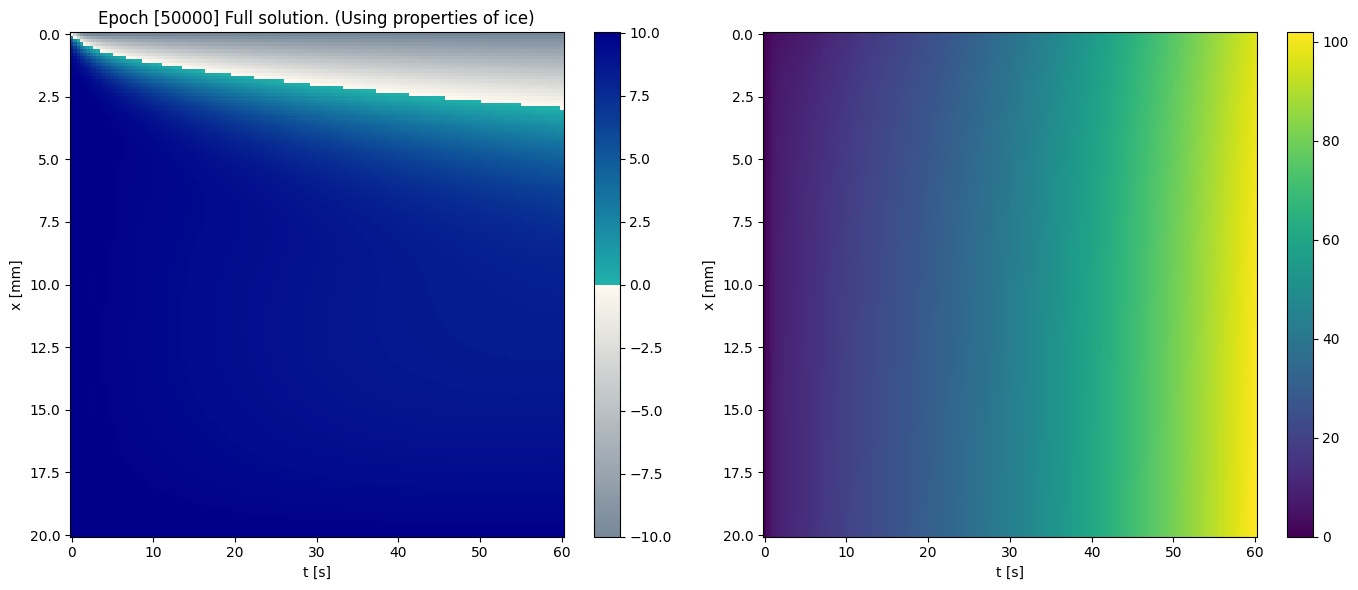

[INFO] 2024-12-06 15:19:23 - [i: 51000/100000] loss: 5331.4648 rate: 656.8 elapsed: 0.03 hr test


KeyboardInterrupt: 

In [ ]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import Ice
from fbpinns.decompositions import MultilevelRectangularDecompositionND, RectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

XMIN, XMAX, TMIN, TMAX = 0., 0.020, 0., 60.

w = 2.9
# subdomain_xss = [[np.linspace(XMIN,XMAX,n_), np.linspace(TMIN,TMAX,n_)] for n_ in (5,)]
# subdomain_wss = [get_subdomain_ws(subdomain_xss[0], w)]

subdomain_xss = [[np.array([XMAX / 2]),np.array([TMAX / 2])]] #+\
    # [[np.linspace(0,XMAX,n_),np.linspace(0,TMAX,n_)] for n_ in (5,)] +\
    # [[np.linspace(0,XMAX,n_),np.linspace(0,TMAX,n_)] for n_ in (10,)]
subdomain_wss = [[np.array([XMAX]),np.array([TMAX])]] #+\
    # [get_subdomain_ws(subdomain_xss[1], w)] +\
    # [get_subdomain_ws(subdomain_xss[2], w)]

# subdomain_xs=[np.linspace(XMIN, XMAX, 8),
#               np.linspace(TMIN, TMAX, 8)]

c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([XMIN,TMIN]),
        xmax=np.array([XMAX,TMAX])
    ),
    problem=Ice,
    problem_init_kwargs = dict(
        sdx=0.0005,
        sdt=1,
        c_ice=4184,#c_ice=2050,
        c_water=4184,
        rho_ice=1000,#rho_ice=910,
        rho_water=1000,
        k_ice=0.6,#k_ice=2.2,
        k_water=0.6,
        L_water=334,
        freeze_temp=0,
        zero_at_h_weight=20.0,
        h_x_weight=1000.0,
    ),
    decomposition=MultilevelRectangularDecompositionND,
    # decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        # subdomain_xs=subdomain_xs,
        # subdomain_ws=get_subdomain_ws(subdomain_xs, w),
        subdomain_xss=subdomain_xss,
        subdomain_wss=subdomain_wss,
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (2, 32, 32
                       , 2),
    ),
    optimiser_kwargs=dict(learning_rate=1e-3),
    scheduler = AllActiveSchedulerND,
    ns=((64,64),),
    n_test=(150,150),
    n_steps=100_000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()